# Demo 3: Unsupervised Clustering
The hierarchy of the h-NNE is inspired by the FINCH clustering (https://github.com/ssarfraz/FINCH-Clustering). This means that during the generation of the hierarchy a collection of partitions of the dataset is generated.\
This set of partitions can useful when one is dealing with unlabeled data. Using different levels of the hierarchy, one can identify clusters which align with the h-NNE projection structure.\
We already presented the functionality in the demo 1 notebook. Here we look at a more realistic scenarion with a larger dataset containing no labels. \
The dataset we use is a list of 3 million word embeddings of dimension 300 based on the Google news dataset.\
WARNING: To run this code you need at least 32GB of RAM.

In [3]:
from gensim import models
import numpy as np
import matplotlib.pyplot as plt

from hnne import HNNE

## Download and load the Google news dataset
3M word embeddings of dimension 300\
The data can be downloaded from this website: https://code.google.com/archive/p/word2vec. The file needed is 'GoogleNews-vectors-negative300.bin.gz', there is a link to it under the section 'Pre-trained word and phrase vectors'.
Once the data is downloaded, one only needs to provide the correct path to 'GoogleNews-vectors-negative300.bin.gz' to the 'load_google_news' function.

In [4]:
def load_google_news(data_path):
    return models.KeyedVectors.load_word2vec_format(
        data_path,
        binary=True
    ).vectors

In [5]:
data_path = './GoogleNews-vectors-negative300.bin.gz'
data = load_google_news(data_path)

In [6]:
data.shape

(3000000, 300)

## Project to 2 dimensions with h-NNE

In [8]:
%%time
hnne = HNNE()
projection = hnne.fit_transform(data)

CPU times: user 1min 23s, sys: 25.1 s, total: 1min 49s
Wall time: 1min 12s


## Create plots with colors based on the first four partitions generated by h-NNE

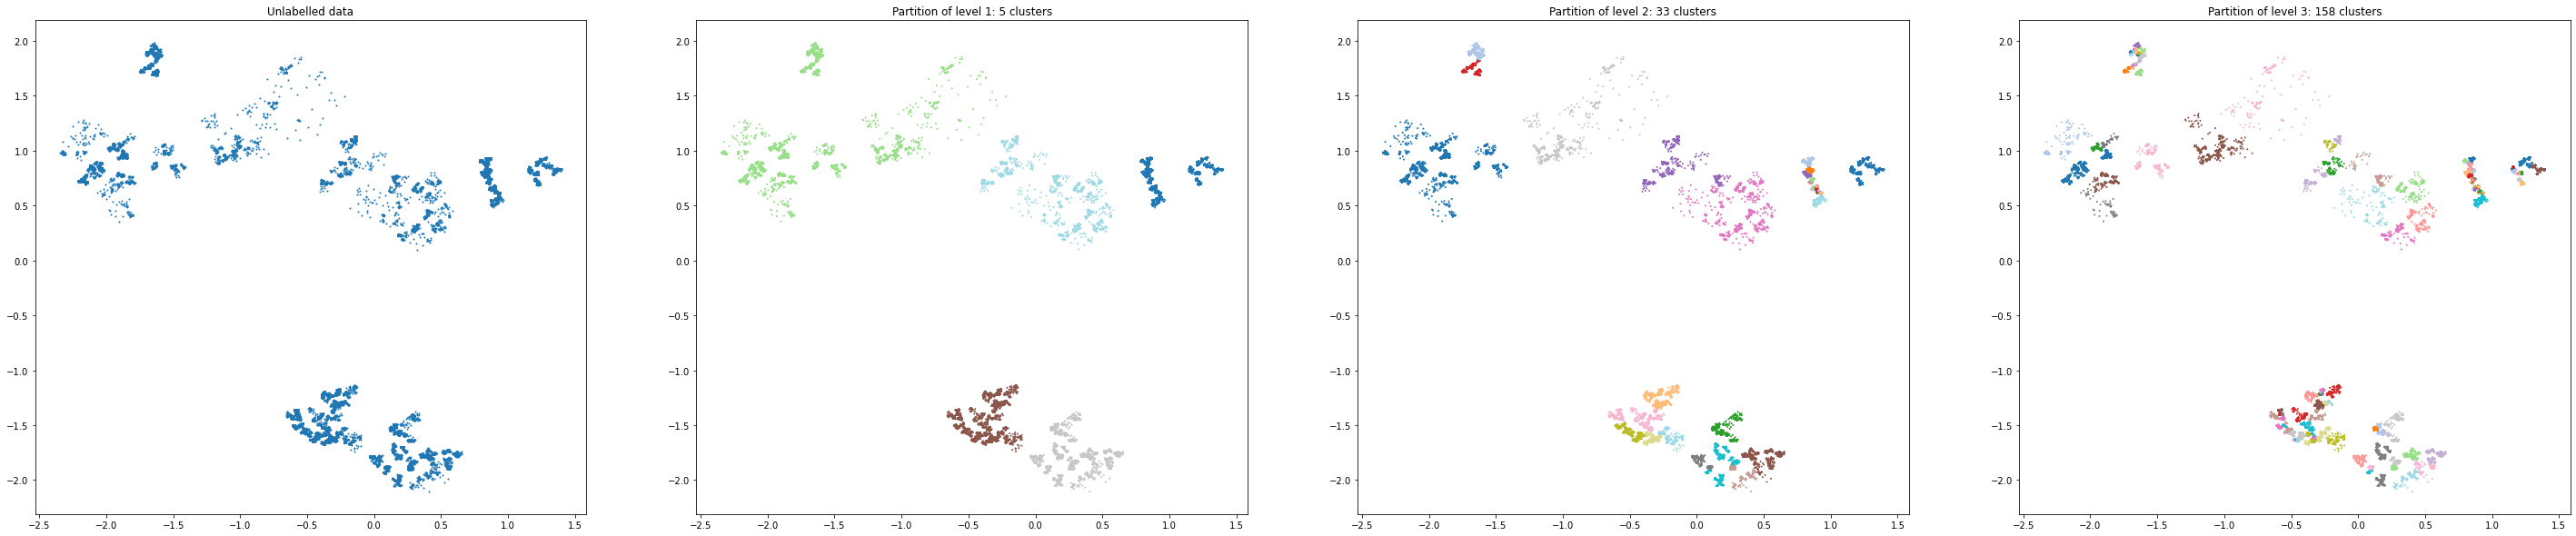

In [17]:
partitions = hnne.hierarchy_parameters.partitions
partition_sizes = hnne.hierarchy_parameters.partition_sizes
number_of_levels = partitions.shape[1]

_, ax = plt.subplots(1, 4, figsize=(10*(4 + 1), 10))

ax[0].set_title('Unlabelled data')
ax[0].scatter(*projection.T, s=1)
# ax[0].set_aspect('equal')

for i in range(1, 4):
    partition_idx = number_of_levels - i
    ax[i].set_title(f'Partition of level {i}: {partition_sizes[partition_idx]} clusters')
    ax[i].scatter(*projection.T, s=1, c=partitions[:, partition_idx], cmap='tab20')
#     ax[i].set_aspect('equal')
plt.show()